<a href="https://colab.research.google.com/github/Shivani-781/Machine-Learning-and-its-Applications/blob/master/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Simple Linear Regression - HeadBrain data**

**Importing** **libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Reading the .csv file**

In [2]:
df = pd.read_csv('headbrain.csv')
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


**Pre-processing**

In [3]:
df.shape

(237, 4)

In [18]:
df.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [19]:
df.isnull().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

**Defining X and Y**

In [5]:
X = df['Head Size(cm^3)'].values
Y = df['Brain Weight(grams)'].values

**SLR manually**

**Calculating slope and intercept**

In [6]:
mean_X = np.mean(X)
mean_Y = np.mean(Y)
num = 0
denom = 0
for i in range(len(X)):
 num += (X[i] - mean_X) * (Y[i] - mean_Y)
 denom += (X[i] - mean_X) ** 2
m = num/denom
c = mean_Y - mean_X * m
print("Slope: ", m)
print("Intercept: ", c)

Slope:  0.26342933948939945
Intercept:  325.57342104944223


**Plotting the Regression line and the data points**

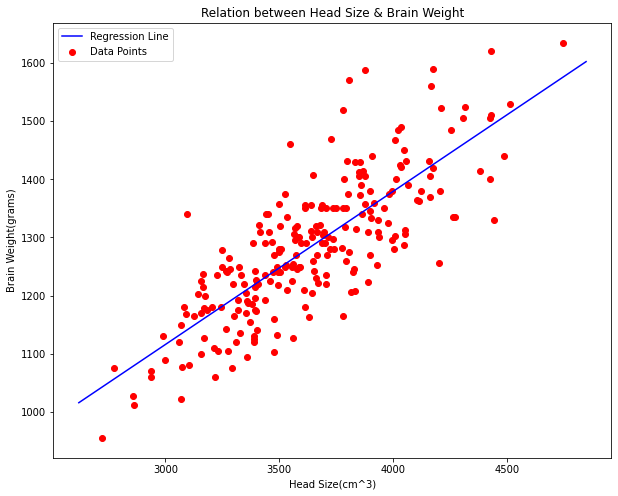

In [17]:
#Plotting the regression line
max_x = np.max(X) + 100
min_x = np.min(X) - 100
x = np.linspace(min_x, max_x, 1000)
y = m*x + c
plt.figure(figsize = (10, 8))
plt.plot(x, y, color = 'blue', label = 'Regression Line')

#Plotting the data points
plt.scatter(X, Y, color = 'red', label = 'Data Points')

plt.title('Relation between Head Size & Brain Weight')
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.legend()
plt.show()

**Calculating RMSE**

In [20]:
rmse = 0
for i in range(len(X)):
  y_pred = m * X[i] + c
  rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/len(X))
print("RMSE: ", rmse)

RMSE:  72.1206213783709


**Calculating R^2 score**

In [22]:
ss_tot = 0
ss_res = 0
for i in range(len(X)):
  y_pred = m * X[i] + c
  ss_res += (Y[i] - y_pred) ** 2
  ss_tot += (Y[i] - mean_Y) ** 2
r2 = 1 - (ss_res/ss_tot)
print("R^2 score: ", r2)

R^2 score:  0.6393117199570003


**Predicting for unknown values**

In [35]:
def pred(x1):
  y1 = m * x1 + c
  print(y1)
pred(4567)

1528.6552144975294


**SLR using Scikit learn**

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [46]:
X = X.reshape((-1, 1))

**Training the model**

In [47]:
lreg = LinearRegression()
lreg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
Y_pred = lreg.predict(X)

**Model evaluation**

In [49]:
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
rmse

72.1206213783709

In [50]:
r2score = lreg.score(X, Y)
r2score

0.639311719957

In [57]:
print(lreg.predict([[4567]]))

[1528.6552145]
